# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science 

In [1]:
import pandas as pd

from urllib.request import urlretrieve 

In [2]:
URL1 = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
#URL2 = 'https://data.seattle.gov/api/views/38vd-gytv/rows.csv?accessType=DOWNLOAD'

In [3]:

urlretrieve(URL1, 'Fremont_bridge.csv')
#urlretrieve(URL2, 'Traffic_Flow')



('Fremont_bridge.csv', <http.client.HTTPMessage at 0x7fcb28bc4c10>)

In [4]:
#!head Fremont_bridge.csv
data = pd.read_csv ('Fremont_bridge.csv', index_col = 'Date', parse_dates = True)
data.head()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


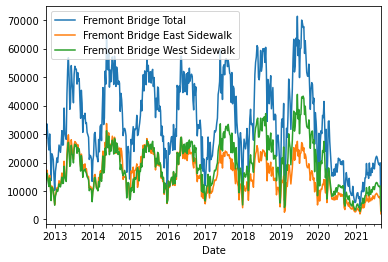

In [5]:
%matplotlib inline 
#data.plot()
data.resample('w').sum().plot();

In [6]:
#data = pd.read_csv ('Traffic_Flow', index_col = 'YEAR')
#data.head()

In [7]:
#%matplotlib inline 
#data.plot()

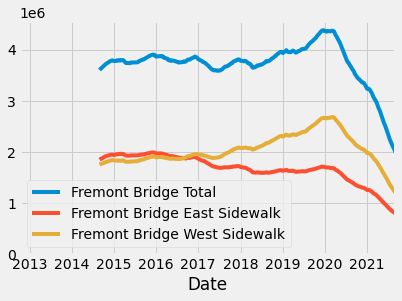

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
#data.resample('w').sum().plot();
ax = data.resample('w').sum().rolling(100).sum().plot();
ax.set_ylim(0, None);

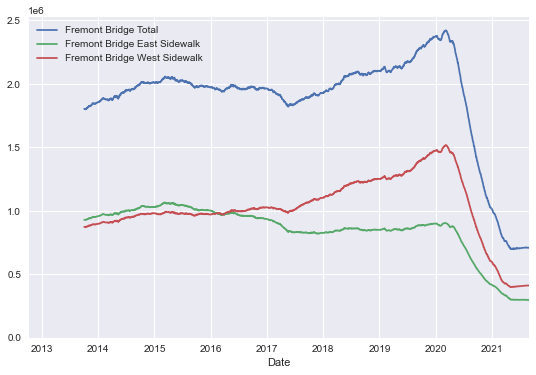

In [9]:
plt.style.use('seaborn') 
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);
#plot clearly showing effects of Covid-19

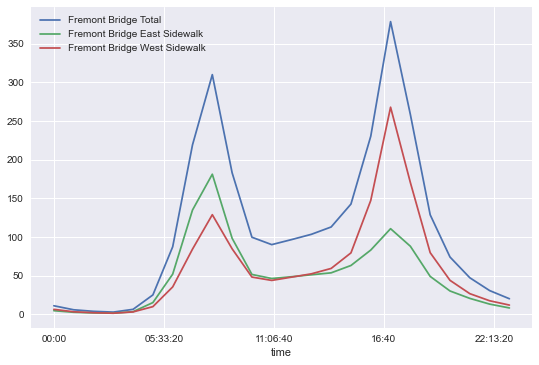

In [10]:
data.groupby(data.index.time).mean().plot();

In [11]:
pivoted = data.pivot_table('Fremont Bridge Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:10 , :8]


,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0,31.0,25.0
06:00:00,155.0,142.0,105.0,27.0,17.0,137.0,153.0,149.0
07:00:00,352.0,319.0,319.0,33.0,26.0,327.0,368.0,340.0
08:00:00,437.0,418.0,370.0,105.0,69.0,457.0,462.0,435.0
09:00:00,276.0,241.0,212.0,114.0,103.0,278.0,275.0,255.0


<AxesSubplot:xlabel='time'>

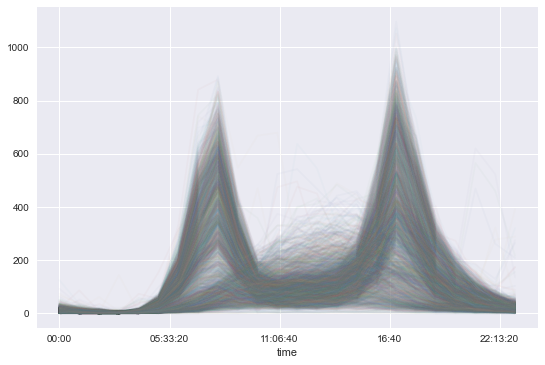

In [12]:
pivoted.plot(legend= False, alpha = 0.03)